## Logistic Regression Lead_Scoring Case Study By:<br> <br>Saurabh Mudgal<br>         and<br> Shashi Ranjan Kumar ##

## 1. Data Sourcing ##

### a. Importing Libraries and Reading the Data ###

In [1]:
#Filtering out the warning messages

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import all the required libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data file(Leads.csv)

edu_leads = pd.read_csv('Leads.csv')

### b. Data Inspection ###

In [4]:
#Shape(rows, columns) of Leads.csv

edu_leads.shape

(9240, 37)

In [5]:
#info of the Leads.csv

edu_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#describe data of Leads.csv

edu_leads.describe(include=np.number)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#To increase the row and column count in display

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [8]:
#view data

edu_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


As, we can see there are some columns/Categorical Variables having value as 'Select' which means visitor didn't select any option , which is now as equally as NaN . It's better we replace 'Select' with 'NaN'

## 2. Exploratory Data Analysis ##

### a. Data Cleaning ###

In Leads dataset, we have following columns:

- `Categorical Columns` : Lead Origin, Lead Sorce, Last Acitivity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Tags, Lead Quality, Lead Profile, City, Asymmetrique Activity Index,	Asymmetrique Profile Index , Last Notable Activity

- `Numerical Columns` : Total Visits, Total Time Spent on Website,  Asymmetrique Activity Score,	Asymmetrique Profile Score, Page Views Per Visit

- `Binary Columns` : Converted, Do Not Email, Do Not Call, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, I agree to pay the amount through cheque, A free copy of Mastering The Interview

#### Seeing the data, we can think of dropping below columns: these columns have unique values ####

Prospect ID, Lead Number

In [9]:
# Dropping columns which are having unique value

edu_leads = edu_leads.drop(['Prospect ID', 'Lead Number'], axis=1)

Now Let's first identify the variables having 'Select' value

In [10]:
#find the column having 1 or more Select value

col = list(edu_leads.columns)
val = ['Select']
col_names = []

for i in range(len(col)):
    if len(edu_leads[col[i]].isin(val).unique())>1:
        col_names.append(col[i])
        
col_names

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

We have 4 columns(`['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'])` having Select value.

In [11]:
#replace 'Select' with 'NaN'

edu_leads = edu_leads.replace('Select', np.nan)

In [12]:
#Let's see the columns having unique values or same values, so that we could an drop those columns 

edu_leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [13]:
#null value percentage

round(100*(edu_leads.isnull().sum()/len(edu_leads)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We have some varibales having higher null values , It's good to drop the varibales which are having more than 40% null values

In [14]:
#Let's drop columns having more than 40% null values

null_columns = edu_leads.isnull().sum()

null_columns = null_columns[null_columns.values/len(edu_leads)>.40]
len(null_columns)

7

We have 7 columns which are having more than 40% null values

In [15]:
#drop the columns

drop_null_Col = list(null_columns.keys())
edu_leads = edu_leads.drop(drop_null_Col,1)

In [16]:
#Let's verify again to see the null value percentage

round(edu_leads.isnull().sum()/len(edu_leads)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Now since we have handled the columns which were higher on the null values percentage

We can now handle the missing values by imputing the appropriate values and Analyse them.

### b. Categorical Attributes Analysis ###

In [17]:
#Let's first check on column 'Lead Source'

edu_leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
testone                 1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

`Google` is having highest number of occurences, hnece we can impute missing values with `Google` but it has two different formats, we can impute the one which is having higher count

In [18]:
#Let's Impute missing values with 'Google'

edu_leads['Lead Source'] = edu_leads['Lead Source'].replace(np.nan, 'Google')

As we can see there are two different formats for value 'Google' , we need to keep it same. We have two approaches to do that: 1- By replacing one with other 2- By capitalizing the first character

In [19]:
#Applying function to capitalize the first character of 'Lead Source' column

edu_leads['Lead Source'] = edu_leads['Lead Source'].apply(lambda x:x.capitalize())

edu_leads['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Press_release           2
Live chat               2
Youtubechannel          1
Welearnblog_home        1
Pay per click ads       1
Nc_edm                  1
Welearn                 1
Blog                    1
Testone                 1
Name: Lead Source, dtype: int64

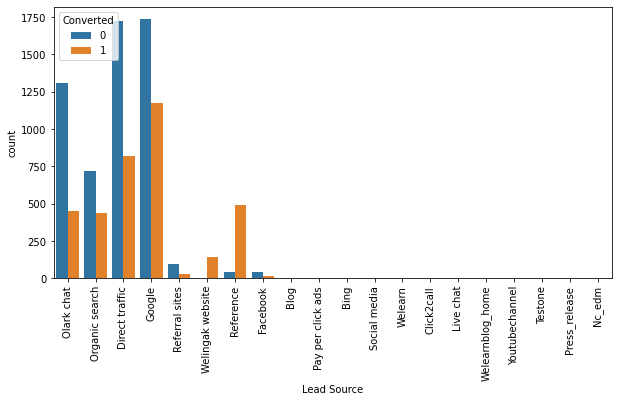

In [20]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c1 = sns.countplot(edu_leads['Lead Source'], hue= edu_leads['Converted'])
c1.set_xticklabels(c1.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b>
It's clearly visible that `Google` has the maximum number of converted leads but graph shows that conversion percentage is higher of the `Reference` and `Welingak website ` categories.

In [21]:
#LEt's combine the low frequency values

edu_leads['Lead Source'] = edu_leads['Lead Source'].replace('Facebook', 'Social media')

edu_leads['Lead Source'] = edu_leads['Lead Source'].replace(['Blog','Pay per click ads',
                                                            'Bing', 'Welearn', 'Click2call', 
                                                             'Live chat', 'Welearnblog_home',
                                                            'Youtubechannel', 'Testone', 'Press_release',
                                                            'Nc_edm'], 'Others')

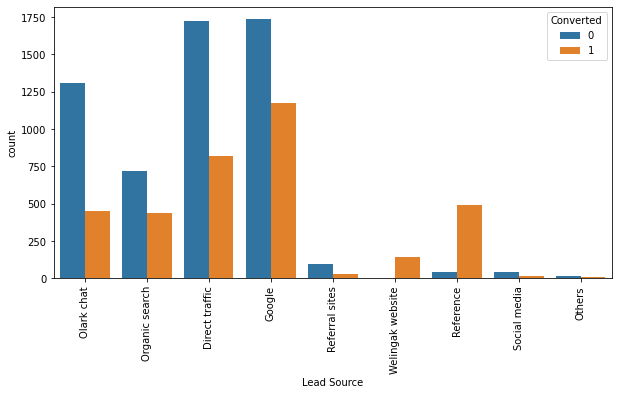

In [22]:
#Let's plot the countplot again on all different lead source

plt.figure(figsize=(10,5))

c1 = sns.countplot(edu_leads['Lead Source'], hue= edu_leads['Converted'])
c1.set_xticklabels(c1.get_xticklabels(), rotation=90)
plt.show()

<b> Inferences: </b>
- Maximum leads are coming through Google and Direct Traffic.
- Conversion rate for Reference and Welingak website is maximum.
- To improve the conversion rate , team should more focus on Olark Search , Organic Search, Direct Traffic and Google. Also, focus should be on generating more keads from reference and welingak website.

In [23]:
#Let's first check on column 'Country'

edu_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
South Africa               4
Germany                    4
Kuwait                     4
Sweden                     3
Philippines                2
Italy                      2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
China                      2
Bangladesh                 2
Uganda                     2
Netherlands                2
Russia                     1
Liberia                    1
Kenya                      1
Indonesia                  1
Switzerland                1
Malaysia      

`India` is having highest number of occurences, hnece we can impute missing values with `India`

In [24]:
#Let's impute missing values with India

edu_leads['Country'] = edu_leads['Country'].replace(np.nan, 'India')

In [25]:
#Column Country has too many different values , so it;d be good to categorise it or differentiate it with respect to India

def country(val):
    category = ""
    if (val == 'India') or (val == 'india') or (val =='unknown') or (val == 'Unknown'):
        category = 'India'
    else:
        category = 'Outside India'
    return category

edu_leads['Country'] = edu_leads.apply(lambda val:country(val['Country']), axis= 1)

edu_leads['Country'].value_counts()
    

        

India            8958
Outside India     282
Name: Country, dtype: int64

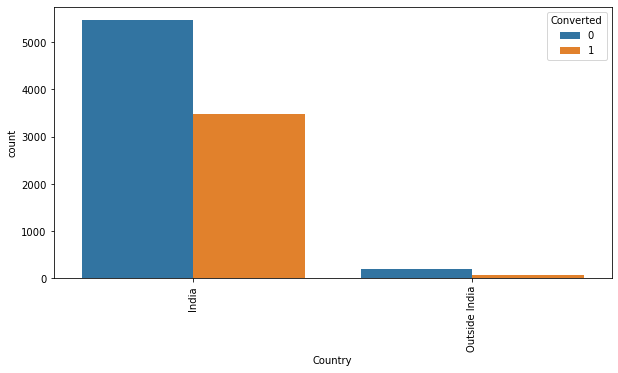

In [26]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c2 = sns.countplot(edu_leads['Country'], hue= edu_leads['Converted'])
c2.set_xticklabels(c2.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b>As We can see leads which are from `India` has the maximum conversion rate and for `outside India` doesn't have much significance.

<b> Note: It can be seen that India is dominating Country variable . Hence, this column can be dropped from the dataset.  </b>

In [27]:
#Let's create a list of columns to be dropped after the analysis

Columns_to_drop = ['Country']

In [28]:
edu_leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
#Let's impute missing values with India

edu_leads['City'] = edu_leads['City'].replace(np.nan, 'Mumbai')

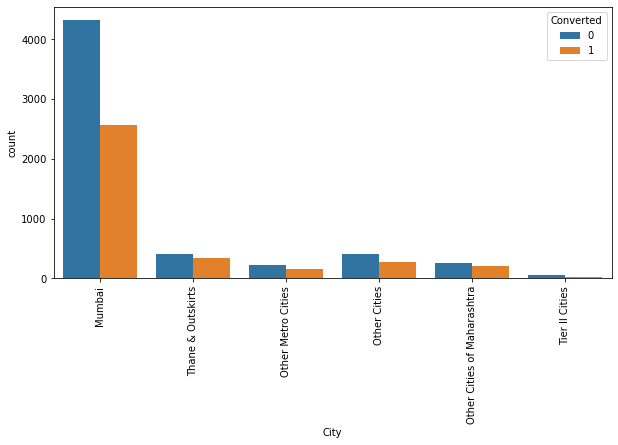

In [30]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c3 = sns.countplot(edu_leads['City'], hue= edu_leads['Converted'])
c3.set_xticklabels(c3.get_xticklabels(), rotation=90)
plt.show()

`Mumbai` is having highest number of occurences, hence we can drop this column. Also, all other major values belong to one state only.

In [31]:
#Add to the list columns_to_drop: City 

Columns_to_drop.append('City')
Columns_to_drop

['Country', 'City']

In [32]:
edu_leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

`Finance Management` is having highest number of occurences but it quite close to `Human Resource Management`. So, it's better to use another category which will have it's own impact. Hence, we are using `Not Specified`.

In [33]:
#Let's impute missing values with 'Not Specified'

edu_leads['Specialization'] = edu_leads['Specialization'].replace(np.nan, 'Not Specified')

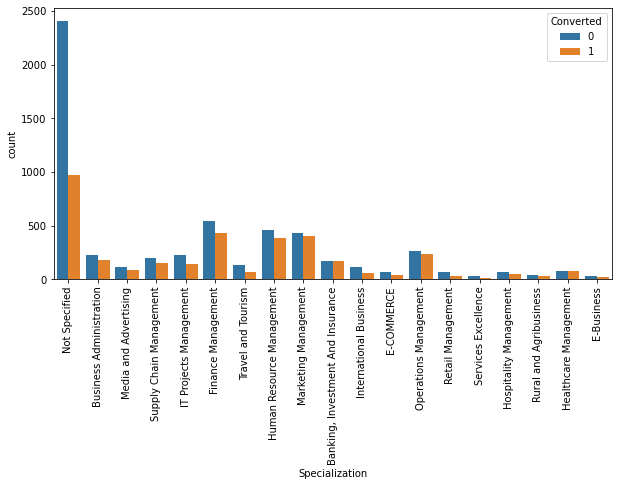

In [34]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c4 = sns.countplot(edu_leads['Specialization'], hue= edu_leads['Converted'])
c4.set_xticklabels(c4.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b>As We can see leads which are having maximum numbers are basically from `Management` also having the maximum leads converted and shows similar trends. It's better we combine these categories.

In [35]:
#Let's combine Management Specialization because they show similar trends

edu_leads['Specialization'] = edu_leads['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'], 'Management_Specializations')

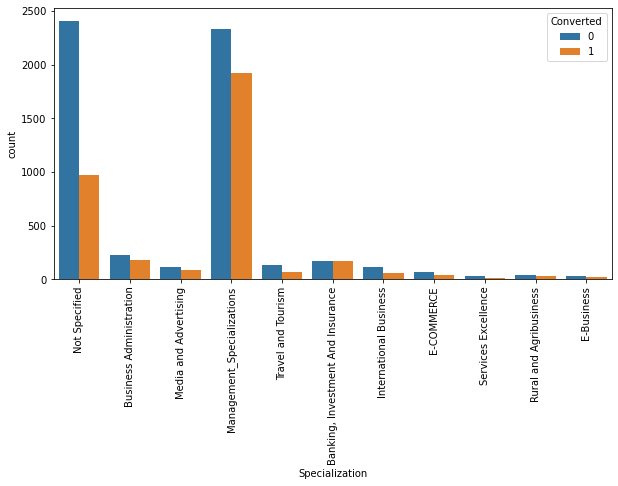

In [36]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c4 = sns.countplot(edu_leads['Specialization'], hue= edu_leads['Converted'])
c4.set_xticklabels(c4.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b> `Management Specializations` has the maximum number of leads converted.

In [37]:
#Let's first check on column 'What is your current occupation'

edu_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

`Unemployed` is having highest number of occurences, hnece we can impute missing values with `Unemployed`

In [38]:
#Let's impute missing values with 'Not Specified'

edu_leads['What is your current occupation'] = edu_leads['What is your current occupation'].replace(np.nan, 'Unemployed')

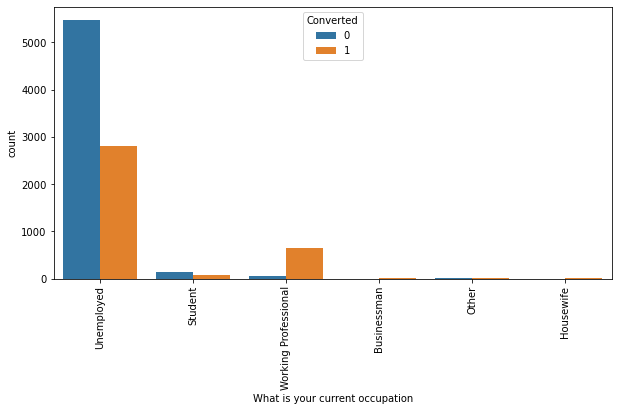

In [39]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c5 = sns.countplot(edu_leads['What is your current occupation'], hue= edu_leads['Converted'])
c5.set_xticklabels(c5.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b> `Unemployed` category has the maximum number of leads converted which means most of the leads are either passed colleges or not working at all but `Working Professional` has the highest conversion rate which means they are looking for upskilling themselves.

In [40]:
#Let's first check on column 'What matters most to you in choosing a course'

edu_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

`Better Career Prospects` is having highest number of occurences, hnece we can impute missing values with `Better Career Prospects`

In [41]:
#Let's impute missing values with 'Btter Career Prospects'

edu_leads['What matters most to you in choosing a course'] = edu_leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

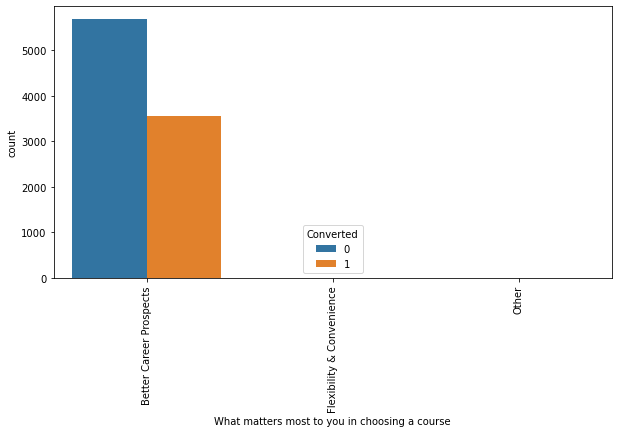

In [42]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c6 = sns.countplot(edu_leads['What matters most to you in choosing a course'], hue= edu_leads['Converted'])
c6.set_xticklabels(c6.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b> People who were looking for growth in their career or `Better Career Prospects` have good conversion.

<b> Note: After replacing missing values with `Better Career Prospects` , we can see this category dominates this variable . Hence it's good to drop this variable. </b>

In [43]:
#Check the value count for 'What matters most to you in choosing a course'

edu_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [44]:
#Add to the list columns_to_drop: What matters most to you in choosing a course 

Columns_to_drop.append('What matters most to you in choosing a course')
Columns_to_drop

['Country', 'City', 'What matters most to you in choosing a course']

In [45]:
#Let's first check on column 'Tags'

edu_leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

As we can see missing value itself has a very large number which replacing it with other category could impact the analysis. It's good to impute missing values with 'Not Specified'.

In [46]:
#Let's impute missing values with 'Not Specified'

edu_leads['Tags'] = edu_leads['Tags'].replace(np.nan, 'Not Specified')

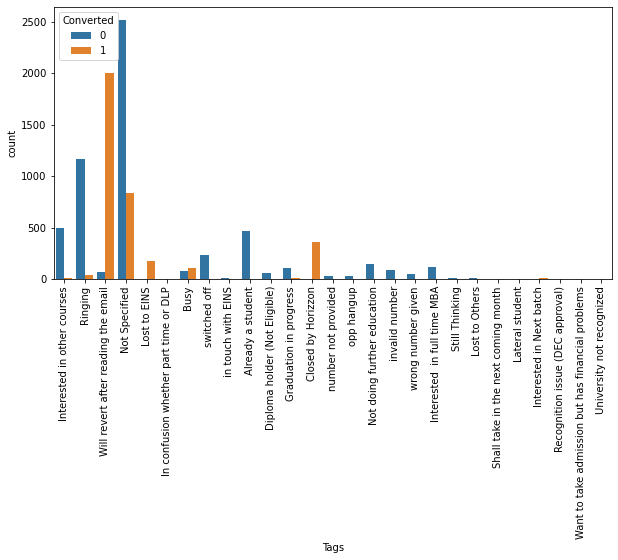

In [47]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c7 = sns.countplot(edu_leads['Tags'], hue= edu_leads['Converted'])
c7.set_xticklabels(c7.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b>

`Not Specified` has maximum leads but category `will revert after reading the email` has the highest conversion rate.
We can drop `Tags` column.

In [48]:
#Add to the list columns_to_drop: Tags 

Columns_to_drop.append('Tags')
Columns_to_drop

['Country', 'City', 'What matters most to you in choosing a course', 'Tags']

In [49]:
#Let's first check on column 'Last Activity'

edu_leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

`Email Opened` is having highest number of occurences, but we have lower range of frequency with other values , we can combine them and replace them with `Others`.

In [50]:
#Let's impute missing values with 'Not Mentioned'

edu_leads['Last Activity'] = edu_leads['Last Activity'].replace(np.nan, 'Others')

In [51]:
#We can combine low frequency values together

edu_leads['Last Activity'] = edu_leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
                                                                 'Approached upfront', 'View in browser link Clicked', 
                                                                 'Email Marked Spam', 'Email Received', 'Visited Booth in Tradeshow', 'Resubscribed to emails'],
                                                               'Others')

In [52]:
#Let's first check on column 'Last Activity'

edu_leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

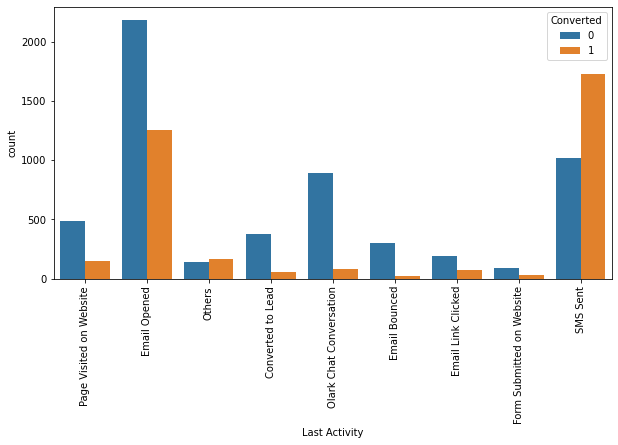

In [53]:
#Let's plot the countplot to check what all different lead source got maximum conversions for Column: Last Activity

plt.figure(figsize=(10,5))

c8 = sns.countplot(edu_leads['Last Activity'], hue= edu_leads['Converted'])
c8.set_xticklabels(c8.get_xticklabels(), rotation=90)
plt.show()

<b>Inferences: </b>
- `SMS Sent` has the highest conversion rate among all the categories .
- `Email Opened` and `Olark Chat` Conversation have maximum number of leads.

In [54]:
#Let's take a count on misisng values

edu_leads.isna().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

In [55]:
#Let's verify again to see the null value percentage

round(edu_leads.isnull().sum()/len(edu_leads)*100,2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [56]:
#We can drop the missing value rows for column 'TotalVisits' and 'Page Views Per Visit', 
#since these columns have very little missing values.

edu_leads = edu_leads.dropna()

In [57]:
#Let's verify again to see the null value percentage

round(edu_leads.isnull().sum()/len(edu_leads)*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [58]:
edu_leads.shape

(9103, 28)

We have successfully handled all the null and missing values

In [59]:
#Let's check on the column 'Lead Origin'

edu_leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

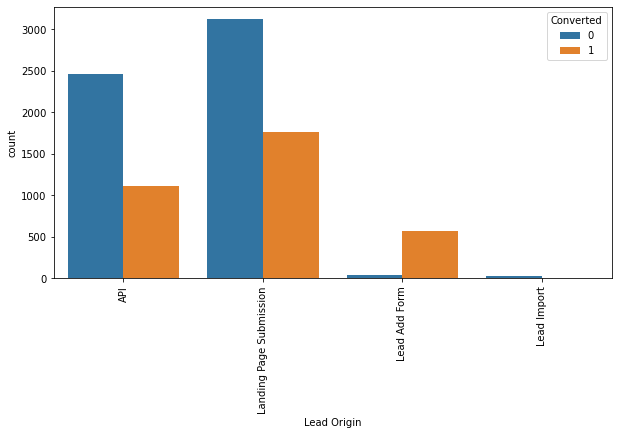

In [60]:
#Let's plot the countplot to check what all different lead source got maximum conversions

plt.figure(figsize=(10,5))

c8 = sns.countplot(edu_leads['Lead Origin'], hue= edu_leads['Converted'])
c8.set_xticklabels(c8.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b>
- `API` and `Landing Page Submission` both have higher number of leads and conversion too.
- `Lead Add Form` has a very high conversion rate but number of leads is not so high.
- `Lead Import` has very less leads.

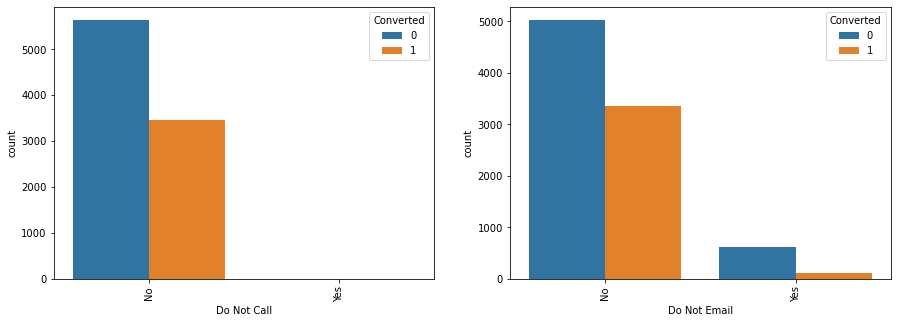

In [61]:
#Let's now visualize count of variables on converted leads 
#for 'Do Not Email' and 'Do Not Call'

plt.figure(figsize=(15,5))

c9 = plt.subplot(1, 2, 1)
c9 = sns.countplot(edu_leads['Do Not Call'], hue= edu_leads['Converted'])
c9.set_xticklabels(c9.get_xticklabels(), rotation=90)

c10 = plt.subplot(1, 2, 2)
c10 = sns.countplot(edu_leads['Do Not Email'], hue= edu_leads['Converted'])
c10.set_xticklabels(c10.get_xticklabels(), rotation=90)


plt.show()


<b> Inference: </b>
- Leads which said No to `Do Not Call` and  `Do Not Email` have higher conversion rate.
- There seems no leads for `Do Not Call` category who chose Yes .
- But still we have some converted leads for `Do Not Email` who chose yes.

### c. Binary Attributes Analysis ###

Do Not Email, Do Not Call, Search, Newspaper Article, X Education Forums, Digital Advertisement, Through Recommendations, Newspaper, Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview

In [62]:
# Checking value counts for column: Do Not Call

edu_leads['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

As we can see No has a very large count in `Do Not Call` which means it has unique value and kind of dominating the variable. We can drop this column.

In [63]:
# Checking value counts for column: Do Not Email

edu_leads['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [64]:
# Checking value counts for column: Search

edu_leads['Search'].value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [65]:
# Checking value counts for column: Magazine

edu_leads['Magazine'].value_counts()

No    9103
Name: Magazine, dtype: int64

In [66]:
# Checking value counts for column: Newspaper Article

edu_leads['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [67]:
# Checking value counts for column: X Education Forums

edu_leads['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [68]:
# Checking value counts for column: Digital Advertisement

edu_leads['Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [69]:
# Checking value counts for column: Through Recommendations

edu_leads['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [70]:
# Checking value counts for column: Newspaper

edu_leads['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [71]:
# Checking value counts for column: Receive More Updates About Our Courses

edu_leads['Receive More Updates About Our Courses'].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [72]:
# Checking value counts for column: Update me on Supply Chain Content

edu_leads['Update me on Supply Chain Content'].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [73]:
# Checking value counts for column: Get updates on DM Content

edu_leads['Get updates on DM Content'].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [74]:
# Checking value counts for column: I agree to pay the amount through cheque

edu_leads['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [75]:
# Checking value counts for column: A free copy of Mastering The Interview

edu_leads['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [76]:
#Let's add these unique value variables to the list of columns to be dropped.

Columns_to_drop.extend(['Do Not Call', 'Search', 'Newspaper Article', 'Magazine', 'X Education Forums',
                        'Digital Advertisement', 'Through Recommendations', 'Newspaper', 
                        'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                        'Get updates on DM Content' , 'I agree to pay the amount through cheque'
                        ])
                

In [77]:
#Checking value count of Last Notable Activity

edu_leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

We can club low frequency values

In [78]:
#Let's club lower frequency values

edu_leads['Last Notable Activity'] = edu_leads['Last Notable Activity'].replace(
                                        ['Email Bounced', 'Unsubscribed', 'Unreachable', 
                                         'Had a Phone Conversation', 'Email Marked Spam',
                                         'Form Submitted on Website', 'Email Received',
                                         'Resubscribed to emails', 'View in browser link Clicked',
                                         'Approached upfront'], 'Other_Notable_Activity')

In [79]:
#Let's check the value count for column: Last Notable Activity

edu_leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_Activity      160
Name: Last Notable Activity, dtype: int64

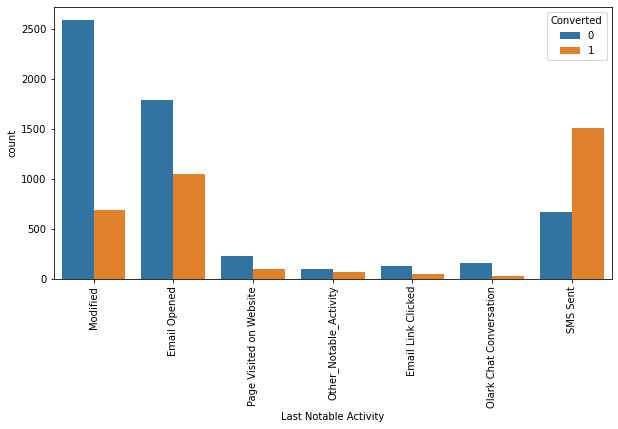

In [80]:
#Let's now visualize the column: Last Notable Activity

plt.figure(figsize=(10,5))

c11 = sns.countplot(edu_leads['Last Notable Activity'], hue= edu_leads['Converted'])
c11.set_xticklabels(c11.get_xticklabels(), rotation=90)
plt.show()

<b> Inference: </b>
`Email Opened` and `SMS Sent` have higher converted leads

In [81]:
#List of columns to be dropped
Columns_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'Tags',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'Newspaper',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [82]:
#Let's now finally drop all the columns are in list

edu_leads = edu_leads.drop(Columns_to_drop, 1)

In [83]:
#Let's check on the data

edu_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

In [84]:
#Check on the data view

edu_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Modified
1,API,Organic search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Email Opened
2,Landing Page Submission,Direct traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Modified


### d. Numerical Attributes Analysis ###

In [85]:
#Let's first check the converted values percentage

Leads_Converted = round(100*(sum(edu_leads['Converted'])/len(edu_leads['Converted'].index)), 2)

Leads_Converted

38.02

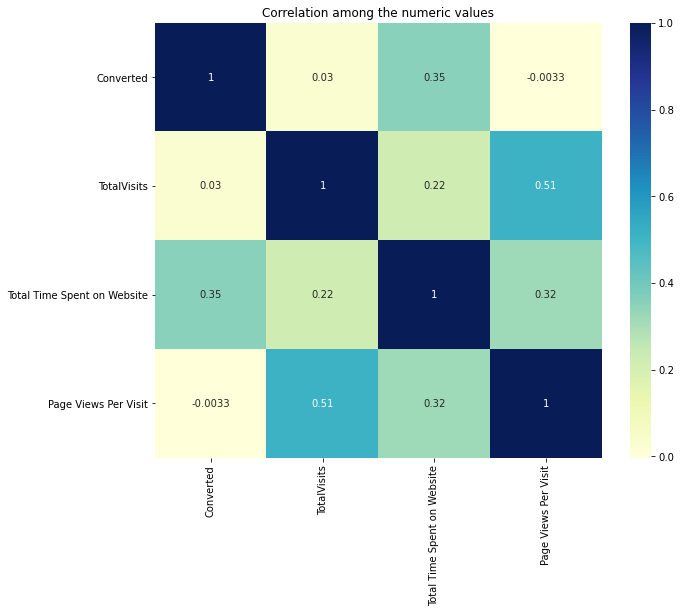

In [86]:
#Let's check correlations of numeric values by plotting Heat Map


plt.figure(figsize=(10,8))

plt.title('Correlation among the numeric values')
sns.heatmap(edu_leads.corr(), annot=True, cmap="YlGnBu")
plt.show()

<b> Inference: </b>
`TotalVisits` and `Page Views Per Visit` have high correlation.

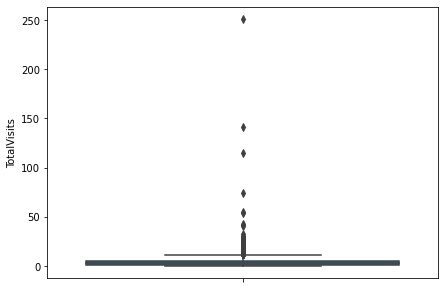

In [87]:
#Let's now visualize the spread of column: Total Visits

plt.figure(figsize=(7,5))
sns.boxplot(y=edu_leads['TotalVisits'])
plt.show()

<b>Inference: </b> 
seeing the plot it is clearly visible that it has some outliers.

In [88]:
#checking different percentile values for column: Total Visits


edu_leads['TotalVisits'].describe(percentiles=[0.05, 0.25, .50, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

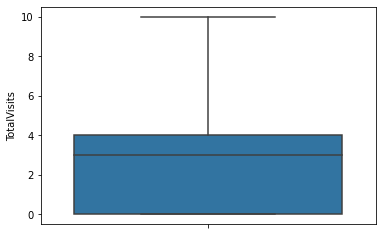

In [89]:
#Outlier Handling: 
#Let's remove top & Bottom 1% of the values

Q3 = edu_leads['TotalVisits'].quantile(.95)
edu_leads = edu_leads[(edu_leads['TotalVisits'] <=Q3)]

Q1 = edu_leads['TotalVisits'].quantile(.01)
edu_leads = edu_leads[(edu_leads['TotalVisits'] >=Q1)]

sns.boxplot(y=edu_leads['TotalVisits'])
plt.show()

Now we don't see any outliers.

In [90]:
#Check on the Dataset

edu_leads.shape

(8750, 12)

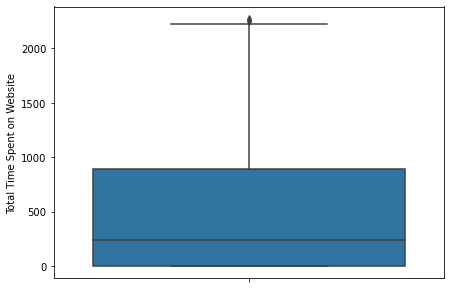

In [91]:
#Let's now visualize the spread of column: Total TIme Spent on Website

plt.figure(figsize=(7,5))
sns.boxplot(y=edu_leads['Total Time Spent on Website'])
plt.show()

<b>Inference: </b> 
Since there are no major outliers for column: Total Time Spent on Website, we don't have to do any Outliers treatment here.

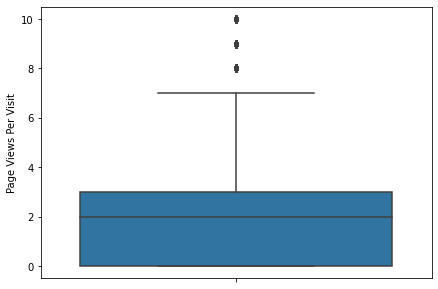

In [92]:
#Let's now visualize the spread of column: Page Views Per Visit

plt.figure(figsize=(7,5))
sns.boxplot(y=edu_leads['Page Views Per Visit'])
plt.show()

In [93]:
#checking different percentile values for column: Page Views Per Visit


edu_leads['Page Views Per Visit'].describe(percentiles=[0.05, 0.25, .50, .75, .90, .95, .99])

count    8750.000000
mean        2.248421
std         1.923434
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

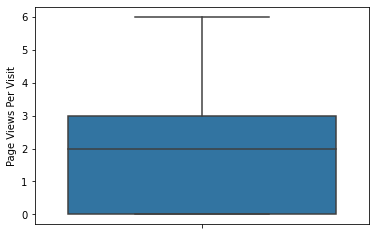

In [94]:
#Outlier Handling: 
#Let's remove top & Bottom values

Q3 = edu_leads['Page Views Per Visit'].quantile(.95)
edu_leads = edu_leads[(edu_leads['Page Views Per Visit'] <=Q3)]

Q1 = edu_leads['Page Views Per Visit'].quantile(.01)
edu_leads = edu_leads[(edu_leads['Page Views Per Visit'] >=Q1)]

sns.boxplot(y=edu_leads['Page Views Per Visit'])
plt.show()

In [95]:
#Check on the Dataset

edu_leads.shape

(8474, 12)

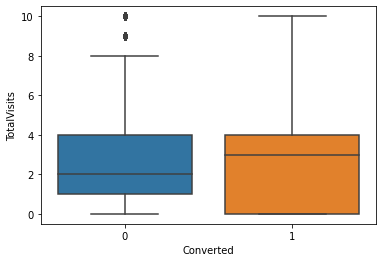

In [96]:
#Now Let's check the spread of  'Total Visits' vs 'Converted' Variable

sns.boxplot(y='TotalVisits', x='Converted', data=edu_leads)
plt.show()

<b> Inferences: </b>

- For Converted and Not Converted leads median is almost similar, so Nothing can be said on the basis of TotalVisits.

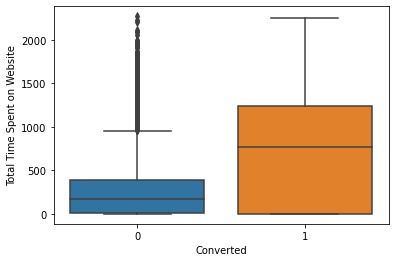

In [97]:
#Checking Spread of 'Total Time Spent on Website' vs 'Converted' variable

sns.boxplot(x=edu_leads.Converted, y=edu_leads['Total Time Spent on Website'])
plt.show()

<b> Inferences: </b>

- Leads which are spending more time on website are more likely to be converted.
- Since the users spending more time on website are getting converted, according to this we should make website more engaging and user friendly.

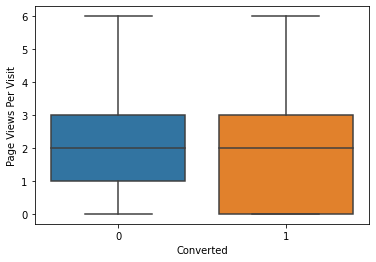

In [98]:
#Now Let's check the spread of  'Page Views Per Visit' vs 'Converted' Variable

sns.boxplot(y='Page Views Per Visit', x='Converted', data=edu_leads)
plt.show()

<b> Inferences: </b>

- For Converted and Not Converted leads median is almost similar, so Nothing can be said on the basis of Page Views Per Visit.

In [99]:
#Let's check one more time on the missing values

round(100*(edu_leads.isnull().sum()/len(edu_leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [100]:
#Shape of Dataset

edu_leads.shape

(8474, 12)

In [101]:
#view of dataset

edu_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Modified
1,API,Organic search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Email Opened
2,Landing Page Submission,Direct traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Modified


### e. Data Transformation ###

Now we need to change the varibales which are having values `Yes` and `No` to <b>Binary Variables</b> `Yes/No` to `1/0`

In [102]:
#getting list of categorical columns

Categorical_col = edu_leads.select_dtypes(include=['object']).columns

Categorical_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We have two columns with binary values Yes and No, we can convert them into 1 and 0

### Dummy Variables ###

First let's get the list of categorical variables

In [103]:
#Mapping Yes and No with 1 and 0

Col_list = ['Do Not Email', 'A free copy of Mastering The Interview']

#function for mapping 1 and 0

def binary_map(x):
    return x.map({'No':0, 'Yes': 1})

#Let's map the values

edu_leads[Col_list] = edu_leads[Col_list].apply(binary_map)

In [104]:
#Let's check on data

edu_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0,Modified
1,API,Organic search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0,Email Opened
2,Landing Page Submission,Direct traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0,Modified


In [105]:
#Let's create dummies

dummy = pd.get_dummies(edu_leads[['Lead Origin', 'What is your current occupation']], drop_first=True)

edu_leads = pd.concat([edu_leads, dummy], 1)

In [106]:
#Dummies

dummy = pd.get_dummies(edu_leads['Specialization'], prefix = 'Specialization')

#we can drop the Not Specified

dummy = dummy.drop(['Specialization_Not Specified'], axis=1)
edu_leads = pd.concat([edu_leads, dummy], axis=1)

In [107]:
#Dummies

dummy = pd.get_dummies(edu_leads['Lead Source'], prefix = 'Lead Source')

#we can drop the Not Specified

dummy = dummy.drop(['Lead Source_Others'], axis=1)
edu_leads = pd.concat([edu_leads, dummy], axis=1)

In [108]:
#Dummies

dummy = pd.get_dummies(edu_leads['Last Activity'], prefix = 'Last Activity')

#we can drop the Not Specified

dummy = dummy.drop(['Last Activity_Others'], axis=1)
edu_leads = pd.concat([edu_leads, dummy], axis=1)

In [109]:
#Dummies

dummy = pd.get_dummies(edu_leads['Last Notable Activity'], prefix = 'Last Notable Activity')

#we can drop the Not Specified

dummy = dummy.drop(['Last Notable Activity_Other_Notable_Activity'], axis=1)
edu_leads = pd.concat([edu_leads, dummy], axis=1)

In [110]:
#Now Let's drop the Original Col_list from the dataset, since we no longer need it

edu_leads.drop(Categorical_col, 1, inplace=True)

In [111]:
#look at the datset

edu_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct traffic,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Welingak website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## 3. Model Building ##

### a. Train-Test Split for Logistic Regression ###

In [112]:
#import train_test_split 

from sklearn.model_selection import train_test_split

#Create dependent variable dataframe and assign to y
y = edu_leads['Converted']

#Create independent variable dataframe and assign to X
X = edu_leads.drop('Converted', axis=1)

In [113]:
#Let's Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [114]:
#X_train data info

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5931 entries, 4329 to 6164
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           5931 non-null   float64
 1   Total Time Spent on Website                           5931 non-null   int64  
 2   Page Views Per Visit                                  5931 non-null   float64
 3   Lead Origin_Landing Page Submission                   5931 non-null   uint8  
 4   Lead Origin_Lead Add Form                             5931 non-null   uint8  
 5   Lead Origin_Lead Import                               5931 non-null   uint8  
 6   What is your current occupation_Housewife             5931 non-null   uint8  
 7   What is your current occupation_Other                 5931 non-null   uint8  
 8   What is your current occupation_Student               5

### b. Scaling of Data ###

In [115]:
#Need to import StandardScaler for scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])


X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct traffic,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Welingak website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4329,0.102041,1.661198,0.554013,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5793,-1.181084,-0.862145,-1.253883,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
435,0.529750,-0.343448,1.156645,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8958,0.529750,0.751170,-0.048619,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4266,0.529750,-0.310222,1.156645,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [116]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

37.65636063252301

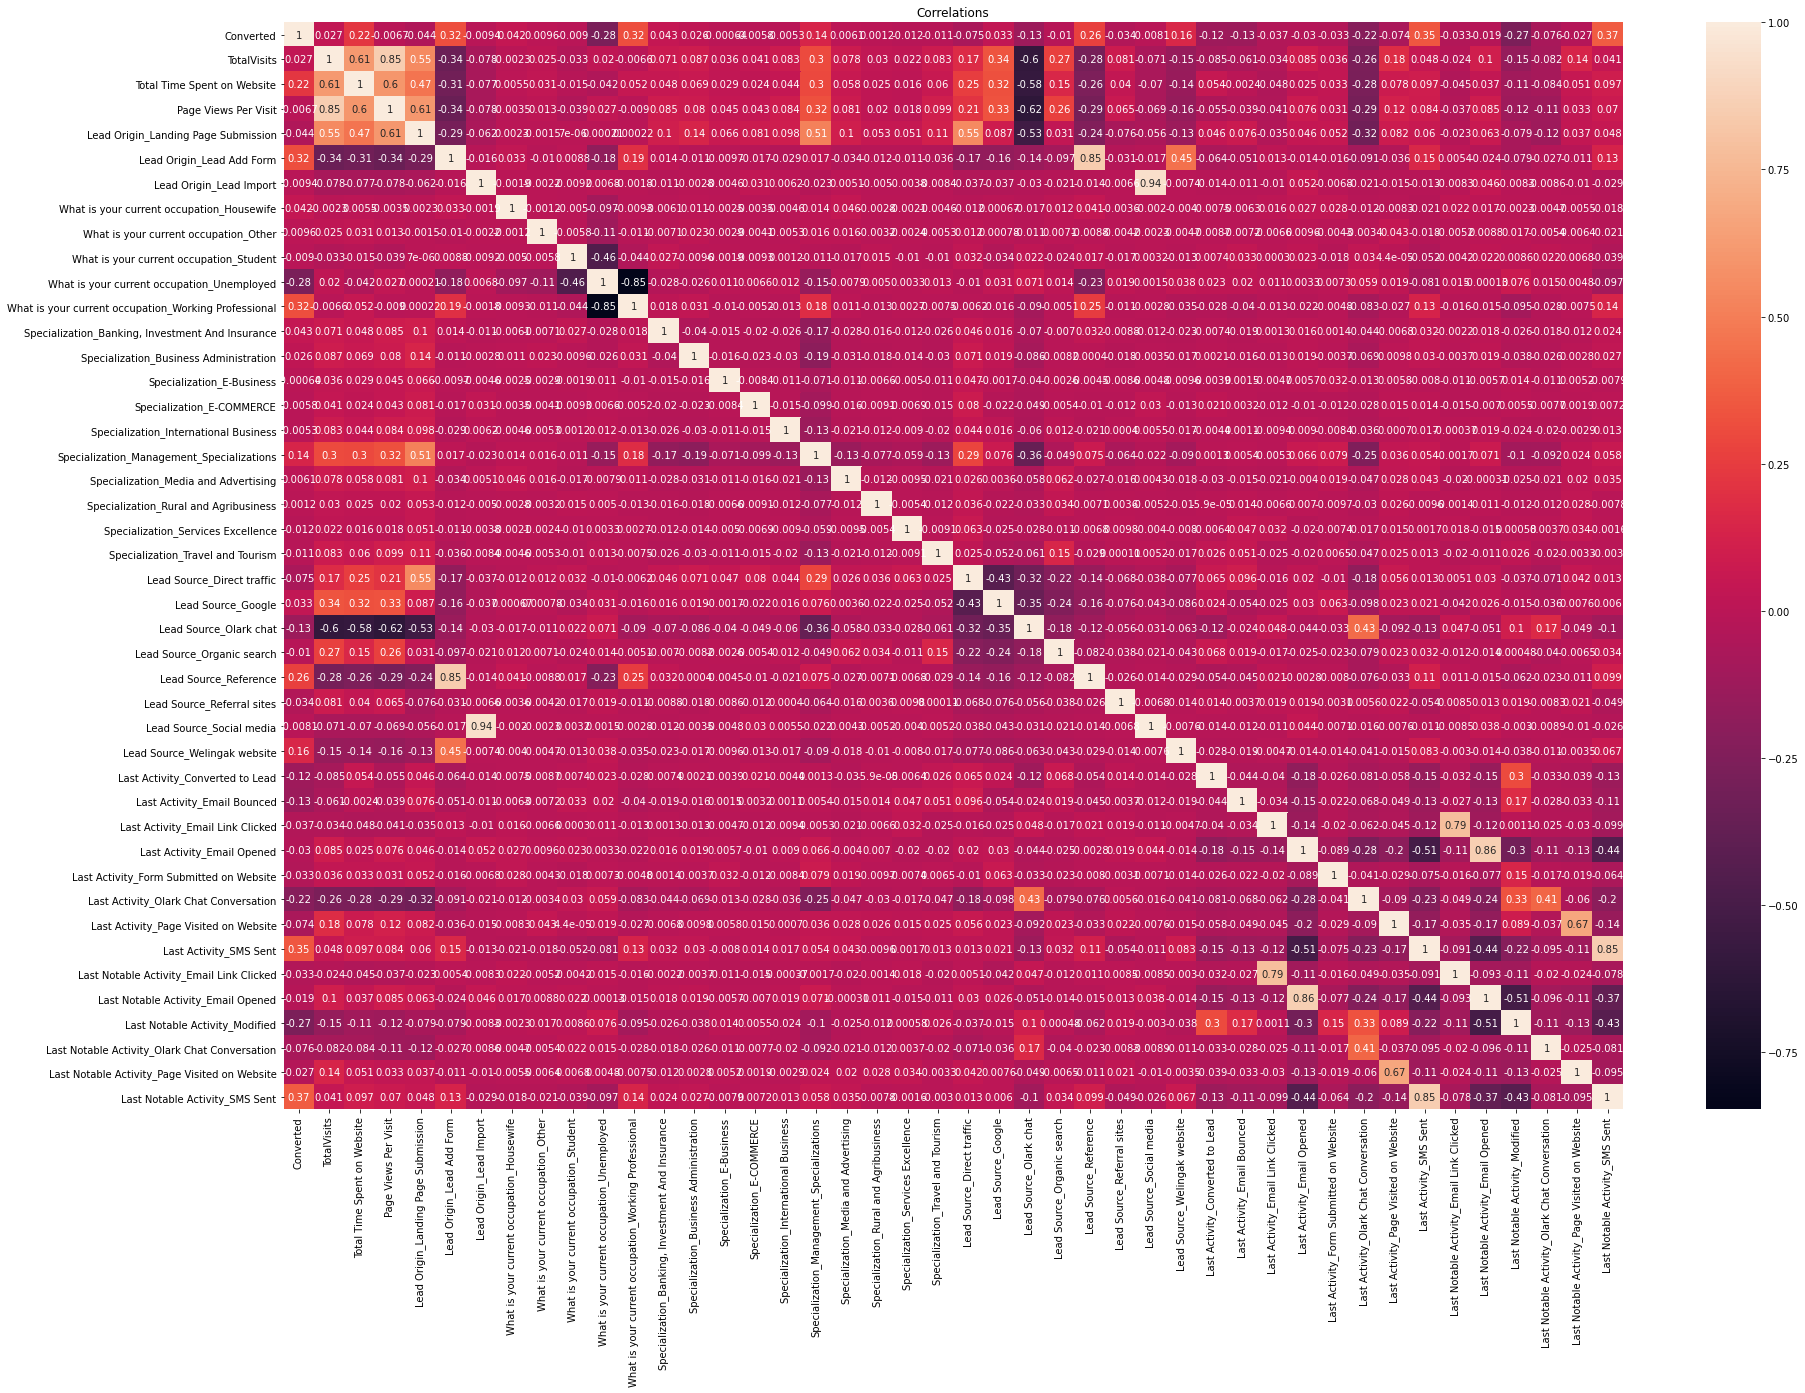

In [117]:
# setting the figure size
plt.figure(figsize=(30,20))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(edu_leads.corr(method='spearman'), annot=True)

plt.show()

#### Dropping highly correlated dummy variable/categories ####

In [118]:
corr_dummy=['What is your current occupation_Student', 'What is your current occupation_Unemployed',
            'Last Notable Activity_Email Opened']

X_train=X_train.drop(corr_dummy,1)      # dropping from X train set

X_test=X_test.drop(corr_dummy,1)        # dropping from X train set

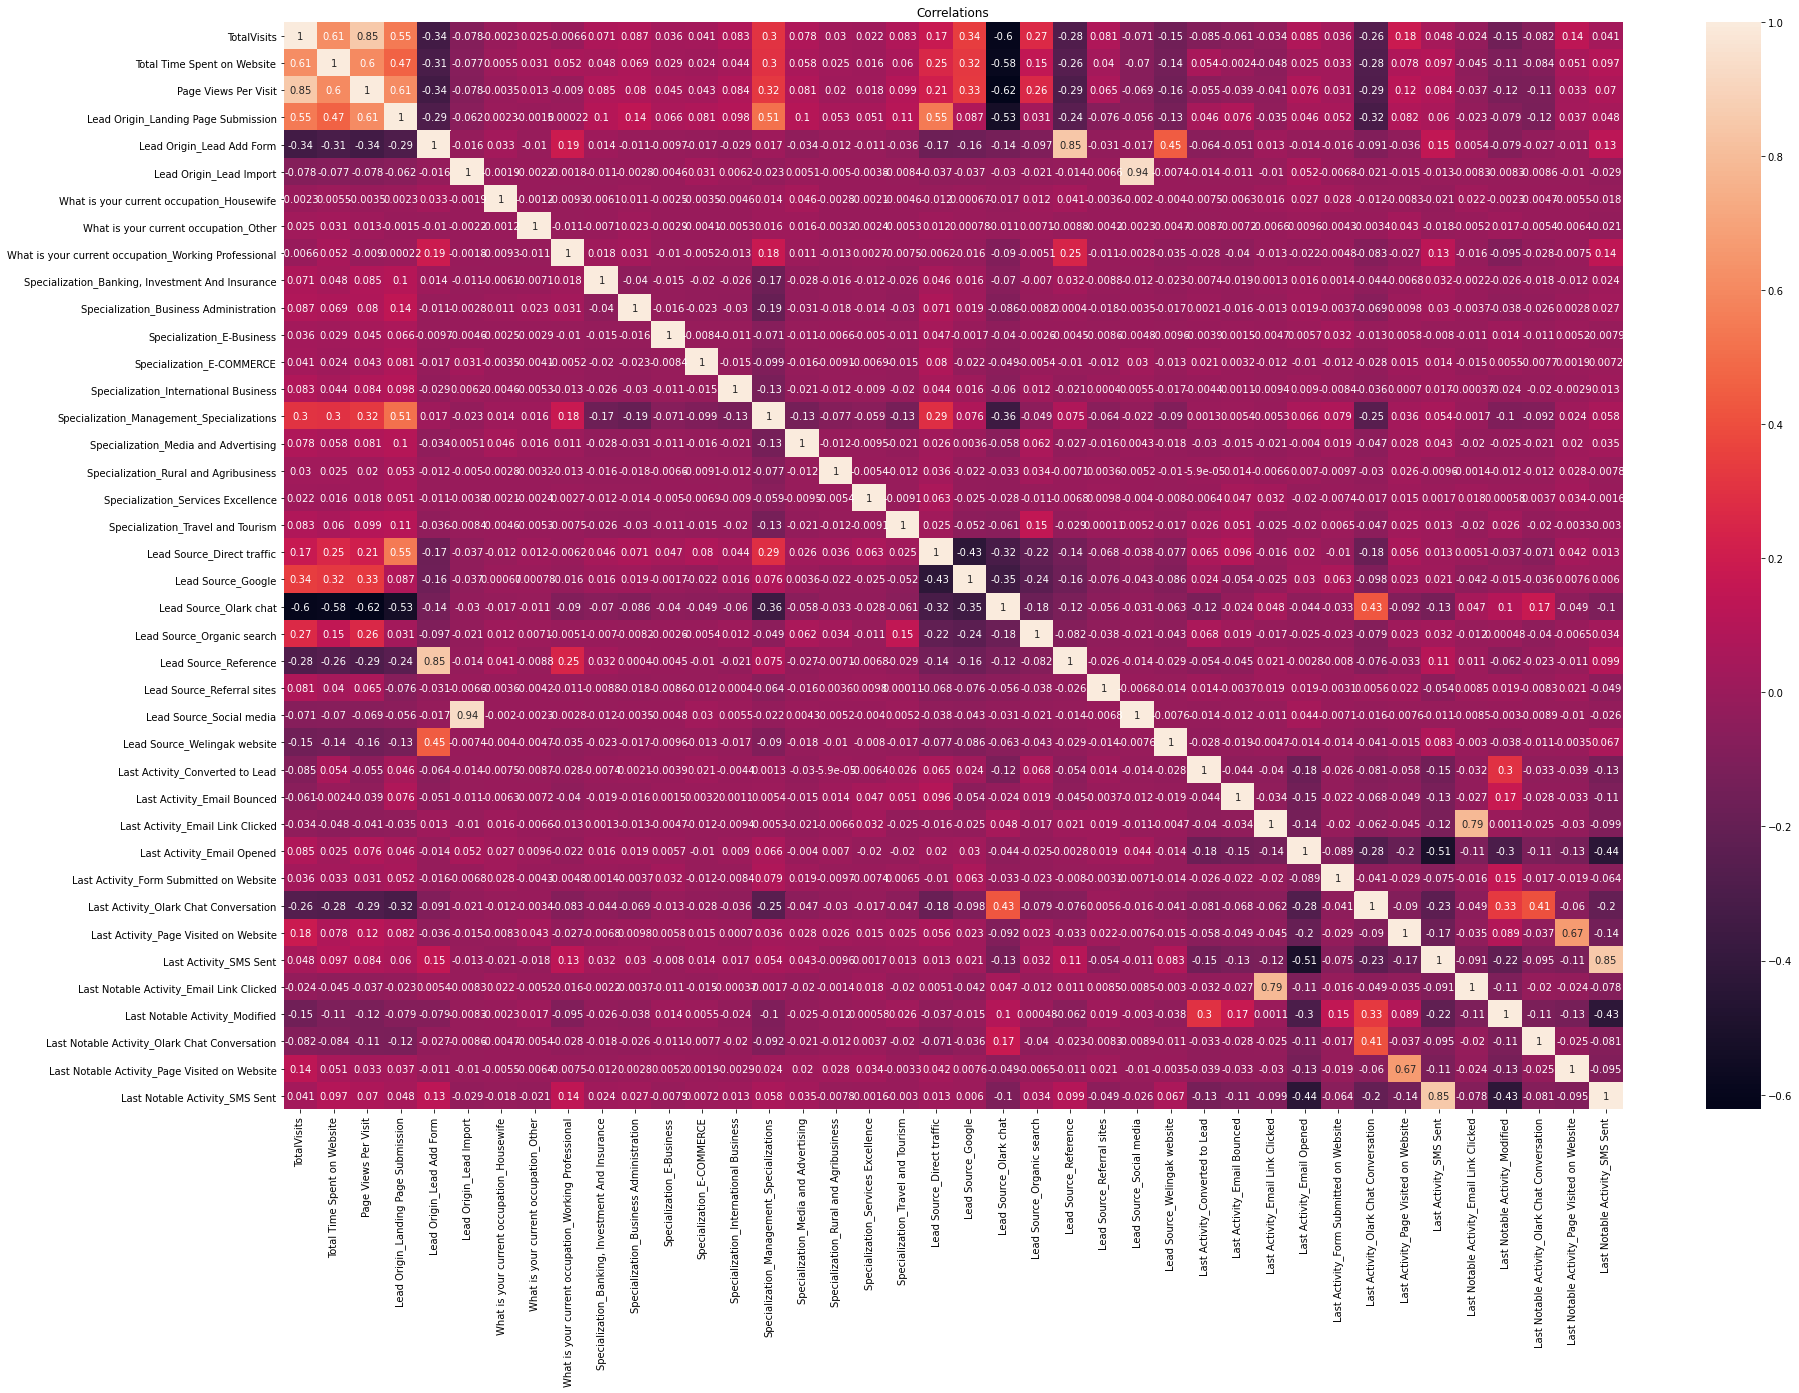

In [119]:
# setting the figure size
plt.figure(figsize=(30,20))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(edu_leads[X_train.columns].corr(method='spearman'), annot=True)

plt.show()

### c. Building the model ###

We will be using the <b>LogisticRegression function from SciKit Learn for it compatibility with RFE(Recursive Feature Elimination)</b>

In [120]:
#import RFE and LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE


In [121]:
#Running RFE with he output number of the variable equal to 15
logreg = LogisticRegression()

rfe = RFE(logreg, 15)    #running RFE

rfe = rfe.fit(X_train, y_train)


In [122]:
#We will use rfe.support_ which will tell us if RFE selects the variable or not
#and
#rfe.ranking_ will tell. us if the next best variabl to be selected and rank accordingly

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 25),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 6),
 ('Specialization_E-COMMERCE', False, 7),
 ('Specialization_International Business', False, 9),
 ('Specialization_Management_Specializations', False, 2),
 ('Specialization_Media and Advertising', False, 5),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specialization_Services Excellence', False, 8),
 ('Specialization_Travel and Tourism', False, 4),
 ('Lead Source_Direct traffic', False, 14),
 ('Lead Sou

In [123]:
#Let's look at the columns selected by RFE

col = X_train.columns[rfe.support_] #columns to select
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Rural and Agribusiness', 'Lead Source_Olark chat',
       'Lead Source_Social media', 'Lead Source_Welingak website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [124]:
X_train.columns[~rfe.support_] #columns to drop

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Other',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct traffic',
       'Lead Source_Google', 'Lead Source_Organic search',
       'Lead Source_Reference', 'Lead Source_Referral sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### d. Building model using statsmodel, for the detailed statistics ###

In [125]:
#let's import statsmodels api 

import statsmodels.api as sm

#### Building Model #1 ####

In [126]:
X_train_sm = sm.add_constant(X_train[col])

logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2473.1
Date:                Mon, 17 May 2021   Deviance:                       4946.3
Time:                        18:27:29   Pearson chi2:                 6.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2156      0.087    -14.052      0.000      -1.385      -1.046
Total Time Spent on Website                              1.0996      0.041     26.648      0.000       1.019       1.181
Lead Origin_Landing Page Submission                     -0.3525      0.093     -3.770      0.000      -0.536      -0.169
Lead Origin_Lead Add Form                                3.5899      0.235     15.284      0.000       3.130       4.050
What is your current occupation_Housewife               23.3746   1.69e+04      0.001      0.999   -3.32e+04    3.32e+04
What is your current occupation_Working Professional     2.6013      0.188     13.860      0.000       2.233       2.969
Specialization_Banking, Investment And Insurance         0.4992      0.190      2.625      0.009       0.127       0.872
Specialization_Rural and Agribusiness                    0.5182      0.404      1.282      0.200      -0.274       1.310
Lead Source_Olark chat                                   1.0395      0.123      8.466      0.000       0.799       1.280
Lead Source_Social media                                 1.3366      0.449      2.978      0.003       0.457       2.216
Lead Source_Welingak website                             2.6544      1.041      2.549      0.011       0.613       4.695
Last Activity_Converted to Lead                         -1.0641      0.199     -5.358      0.000      -1.453      -0.675
Last Activity_Email Bounced                             -2.1291      0.361     -5.904      0.000      -2.836      -1.422
Last Activity_Form Submitted on Website                 -0.6116      0.320     -1.909      0.056      -1.239       0.016
Last Activity_Olark Chat Conversation                   -1.8104      0.179    -10.111      0.000      -2.161      -1.459
Last Notable Activity_SMS Sent                           1.5376      0.082     18.683      0.000       1.376       1.699
========================================================================================================================
"""

Since p-value for `What is your current occupation_Housewife` is quite high, we need to drop this variable.

In [127]:
#Let's drop 'What is your current occupation_Housewife' variable with high p-value

col = col.drop(['What is your current occupation_Housewife'], 1)

#### Checking VIF ####

In [128]:
#Check for VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
#Let's now check the VIF for all the feature

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
6,Lead Source_Olark chat,1.59
2,Lead Origin_Lead Add Form,1.55
1,Lead Origin_Landing Page Submission,1.44
13,Last Notable Activity_SMS Sent,1.40
12,Last Activity_Olark Chat Conversation,1.37
0,Total Time Spent on Website,1.31
8,Lead Source_Welingak website,1.31
3,What is your current occupation_Working Profes...,1.18
10,Last Activity_Email Bounced,1.06
4,"Specialization_Banking, Investment And Insurance",1.05


VIF values looks promising , since all the values are below 5. There is no need to drop any variable from VIF.

#### Building Model #2 ####

In [130]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2479.2
Date:                Mon, 17 May 2021   Deviance:                       4958.4
Time:                        18:27:29   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2106      0.086    -14.014      0.000      -1.380      -1.041
Total Time Spent on Website                              1.0992      0.041     26.674      0.000       1.018       1.180
Lead Origin_Landing Page Submission                     -0.3477      0.093     -3.725      0.000      -0.531      -0.165
Lead Origin_Lead Add Form                                3.5954      0.235     15.319      0.000       3.135       4.055
What is your current occupation_Working Professional     2.5958      0.188     13.833      0.000       2.228       2.964
Specialization_Banking, Investment And Insurance         0.4930      0.190      2.595      0.009       0.121       0.865
Specialization_Rural and Agribusiness                    0.5106      0.404      1.264      0.206      -0.281       1.302
Lead Source_Olark chat                                   1.0366      0.123      8.450      0.000       0.796       1.277
Lead Source_Social media                                 1.3318      0.449      2.968      0.003       0.452       2.211
Lead Source_Welingak website                             2.6457      1.041      2.541      0.011       0.605       4.687
Last Activity_Converted to Lead                         -1.0710      0.199     -5.395      0.000      -1.460      -0.682
Last Activity_Email Bounced                             -2.1356      0.361     -5.923      0.000      -2.842      -1.429
Last Activity_Form Submitted on Website                 -0.6187      0.320     -1.932      0.053      -1.246       0.009
Last Activity_Olark Chat Conversation                   -1.8135      0.179    -10.131      0.000      -2.164      -1.463
Last Notable Activity_SMS Sent                           1.5305      0.082     18.615      0.000       1.369       1.692
========================================================================================================================
"""

p-value for `Specialization_E-COMMERCE` is higher than acceptable range, we need to drop this variable.

In [131]:
#Let's drop variable 'Specialization_E-COMMERCE'
col = col.drop(['Specialization_Rural and Agribusiness'],1)

#### Checking VIF ####

In [132]:
#Let's now check the VIF for all the feature

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Lead Source_Olark chat,1.59
2,Lead Origin_Lead Add Form,1.55
1,Lead Origin_Landing Page Submission,1.43
12,Last Notable Activity_SMS Sent,1.40
11,Last Activity_Olark Chat Conversation,1.37
0,Total Time Spent on Website,1.31
7,Lead Source_Welingak website,1.31
3,What is your current occupation_Working Profes...,1.18
9,Last Activity_Email Bounced,1.06
4,"Specialization_Banking, Investment And Insurance",1.05


<b> VIF values look good. </b>

#### Building Model #3 ####

In [133]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5917
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2480.0
Date:                Mon, 17 May 2021   Deviance:                       4960.0
Time:                        18:27:29   Pearson chi2:                 6.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2072      0.086    -13.991      0.000      -1.376      -1.038
Total Time Spent on Website                              1.0987      0.041     26.672      0.000       1.018       1.179
Lead Origin_Landing Page Submission                     -0.3435      0.093     -3.685      0.000      -0.526      -0.161
Lead Origin_Lead Add Form                                3.5959      0.235     15.324      0.000       3.136       4.056
What is your current occupation_Working Professional     2.5925      0.188     13.823      0.000       2.225       2.960
Specialization_Banking, Investment And Insurance         0.4877      0.190      2.568      0.010       0.116       0.860
Lead Source_Olark chat                                   1.0357      0.123      8.446      0.000       0.795       1.276
Lead Source_Social media                                 1.3285      0.449      2.961      0.003       0.449       2.208
Lead Source_Welingak website                             2.6422      1.041      2.537      0.011       0.601       4.683
Last Activity_Converted to Lead                         -1.0711      0.199     -5.395      0.000      -1.460      -0.682
Last Activity_Email Bounced                             -2.1347      0.361     -5.918      0.000      -2.842      -1.428
Last Activity_Form Submitted on Website                 -0.6239      0.320     -1.949      0.051      -1.251       0.004
Last Activity_Olark Chat Conversation                   -1.8164      0.179    -10.149      0.000      -2.167      -1.466
Last Notable Activity_SMS Sent                           1.5264      0.082     18.591      0.000       1.366       1.687
========================================================================================================================
"""

p-value for `Specialization_Business Administration` is higher than acceptable range, we need to drop this variable.

In [134]:
#Let's drop 'Specialization_Business Administration' variable

col = col.drop(['Last Activity_Form Submitted on Website'],1)

In [135]:
#Let's check the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Lead Source_Olark chat,1.58
2,Lead Origin_Lead Add Form,1.55
1,Lead Origin_Landing Page Submission,1.41
11,Last Notable Activity_SMS Sent,1.40
10,Last Activity_Olark Chat Conversation,1.37
0,Total Time Spent on Website,1.31
7,Lead Source_Welingak website,1.31
3,What is your current occupation_Working Profes...,1.18
9,Last Activity_Email Bounced,1.06
4,"Specialization_Banking, Investment And Insurance",1.05


<b> VIF values look good, No variable needs to be removed </b>

#### Building Model #4 ####

In [136]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5918
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2482.0
Date:                Mon, 17 May 2021   Deviance:                       4964.0
Time:                        18:27:29   Pearson chi2:                 6.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2171      0.086    -14.130      0.000      -1.386      -1.048
Total Time Spent on Website                              1.0965      0.041     26.656      0.000       1.016       1.177
Lead Origin_Landing Page Submission                     -0.3478      0.093     -3.733      0.000      -0.530      -0.165
Lead Origin_Lead Add Form                                3.5900      0.234     15.310      0.000       3.130       4.050
What is your current occupation_Working Professional     2.5874      0.187     13.822      0.000       2.220       2.954
Specialization_Banking, Investment And Insurance         0.4890      0.190      2.576      0.010       0.117       0.861
Lead Source_Olark chat                                   1.0327      0.123      8.421      0.000       0.792       1.273
Lead Source_Social media                                 1.3354      0.449      2.976      0.003       0.456       2.215
Lead Source_Welingak website                             2.6512      1.041      2.547      0.011       0.611       4.692
Last Activity_Converted to Lead                         -1.0566      0.198     -5.328      0.000      -1.445      -0.668
Last Activity_Email Bounced                             -2.1200      0.361     -5.880      0.000      -2.827      -1.413
Last Activity_Olark Chat Conversation                   -1.8044      0.179    -10.089      0.000      -2.155      -1.454
Last Notable Activity_SMS Sent                           1.5398      0.082     18.812      0.000       1.379       1.700
========================================================================================================================
"""

In [137]:
#Let's check on VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,Lead Source_Olark chat,1.58
2,Lead Origin_Lead Add Form,1.55
1,Lead Origin_Landing Page Submission,1.41
11,Last Notable Activity_SMS Sent,1.40
10,Last Activity_Olark Chat Conversation,1.37
0,Total Time Spent on Website,1.31
7,Lead Source_Welingak website,1.31
3,What is your current occupation_Working Profes...,1.18
9,Last Activity_Email Bounced,1.06
4,"Specialization_Banking, Investment And Insurance",1.05


<b> VIF values are very good which shows there is no multicollinearity among variables </b>

In [138]:
#Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4329    0.563798
5793    0.996146
435     0.125486
8958    0.322733
4266    0.495637
3766    0.090979
1377    0.234911
3834    0.485216
7558    0.026336
1913    0.601103
dtype: float64

In [139]:
#Let's reshape the y_train_pred

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56379752, 0.99614607, 0.12548625, 0.32273267, 0.4956372 ,
       0.09097869, 0.23491131, 0.4852156 , 0.02633605, 0.60110332])

In [140]:
#Let's now check on the converted and converted probability

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})

y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.563798,4329
1,1,0.996146,5793
2,0,0.125486,435
3,0,0.322733,8958
4,1,0.495637,4266


In [141]:
#Let's filter out the Converted_prob and assign the Predicted value

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.563798,4329,1
1,1,0.996146,5793,1
2,0,0.125486,435,0
3,0,0.322733,8958,0
4,1,0.495637,4266,1


### e. Create metrics ###

In [142]:
#Let's import metrics 

from sklearn import metrics

In [143]:
#Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

print(confusion)

[[3017  686]
 [ 493 1735]]


#### Calculate the accuracy ####

In [144]:
#Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8012139605462822


#### Metrics beyond simply accuracy ####

In [145]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

#### Sensitivity ####

In [146]:
#Let's see the sensitivity of our logistic regression model

TP/float(TP+FN)

0.7787253141831239

#### Specificity ####

In [147]:
#Let's see the senspecificity of our logistic regression model

TN/float(TN+FP)

0.8147448015122873

#### False Positive Rate ####

In [148]:
#calculate False Positive Rate- predicting conversion when customer does not have convert

print(FP/float(TN+FP))

0.18525519848771266


#### Positive Predictive Value ####

In [149]:
#positive predictive value

print(TP/float(TP+FP))

0.7166460140437836


#### Negative Predictive Value ####

In [150]:
#Negative Predictive Value

print(TN/float(TN+FN))

0.8595441595441595


### f. Plot ROC Curve ###

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

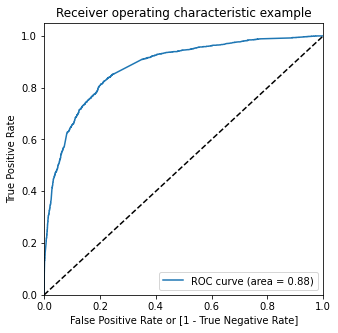

In [153]:
#draw ROC

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC Curve value we are getting is 0.88, which is a really good value and shows a good predictive model.

### g. Finding Optimal CutOff Point ###

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [154]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.563798,4329,1,1,1,1,1,1,1,0,0,0,0
1,1,0.996146,5793,1,1,1,1,1,1,1,1,1,1,1
2,0,0.125486,435,0,1,1,0,0,0,0,0,0,0,0
3,0,0.322733,8958,0,1,1,1,1,0,0,0,0,0,0
4,1,0.495637,4266,1,1,1,1,1,1,0,0,0,0,0


### h. Calculate accuracy, sensitivity, specificity ###

In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

#import confusion_matrix 

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375653  1.000000  0.000000
0.1   0.1  0.593829  0.965440  0.370240
0.2   0.2  0.734278  0.916966  0.624359
0.3   0.3  0.797336  0.833034  0.775857
0.4   0.4  0.807621  0.754488  0.839590
0.5   0.5  0.810656  0.686715  0.885228
0.6   0.6  0.807790  0.623429  0.918715
0.7   0.7  0.779464  0.494165  0.951121
0.8   0.8  0.762097  0.413824  0.971645
0.9   0.9  0.713876  0.257181  0.988658


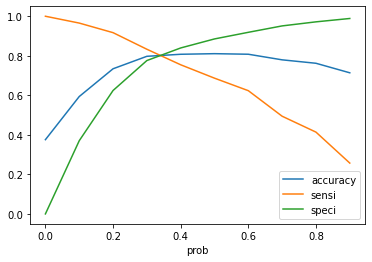

In [156]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability. ####

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.563798,4329,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.996146,5793,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.125486,435,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.322733,8958,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.495637,4266,1,1,1,1,1,1,0,0,0,0,0,1


In [158]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8012139605462822

In [159]:
#Let's create the confusion metrics 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3017,  686],
       [ 493, 1735]])

In [160]:
TP = confusion2[1,1] #true positive
TN = confusion2[0,0] #true negative
FP = confusion2[0,1] #false positive
FN = confusion2[1,0] #false negative

#### Sensitivity ####

In [161]:
#Let's see the sensitivity of our logistic regression model

TP/float(TP+FN)

0.7787253141831239

#### Specificity ####

In [162]:
#Let's see the senspecificity of our logistic regression model

TN/float(TN+FP)

0.8147448015122873

<b> Observation: </b>

Seeing the results of the model, it seems model is performing well. The value of `ROC curve` is `0.88` , which is very good. 
Below is the values for the Train Data:

- <b>Accuracy    :</b> `80.12%`
- <b>Sensitivity :</b> `77.87%`
- <b>Specificity :</b> `81.47%`

#### False Positive Rate ####

In [163]:
#calculate False Positive Rate- predicting conversion when customer does not have convert

print(FP/float(TN+FP))

0.18525519848771266


#### Positive Predictive Value ####

In [164]:
#positive predictive value

print(TP/float(TP+FP))

0.7166460140437836


#### Negative Predictive Value ####

In [165]:
#Negative Predictive Value

print(TN/float(TN+FN))

0.8595441595441595


In [166]:
#Let's look at the confusion matrix again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion3

array([[3017,  686],
       [ 493, 1735]])

### i. Precision and Recall ###

#### Precision ####


TP/TP+FP



In [167]:
#Precision

confusion3[1,1]/(confusion3[1,1] + confusion3[0,1])

0.7166460140437836

#### Recall ####


TP/TP+FN



In [168]:
#Precision

confusion3[1,1]/(confusion3[1,1] + confusion3[1,0])

0.7787253141831239

In [169]:
#Let's calculate the pression score and recall score

from sklearn.metrics import precision_score, recall_score

<b> Precision Score </b>

In [170]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7166460140437836

<b> Recall Score </b>

In [171]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7787253141831239

Below are the scores for Precision nd Recall Respectively:

- <b>Precision Score :</b> `71.66%`
- <b>Recall Score :</b> `77.87%`

### j. Precision Recall Tradeoff ###

In [172]:
#import library for precision recall curve

from sklearn.metrics import precision_recall_curve

In [173]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_prob)

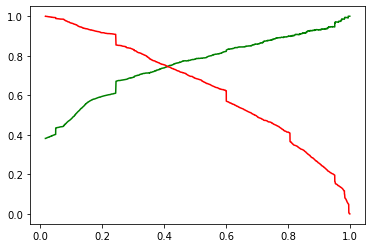

In [174]:
#plot curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### k. Making predictions on the test set ###

In [175]:
#scaling the test set

# num_cols = X_test.select_dtypes(include= ['float64', 'int64']).columns

X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct traffic,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Welingak website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7709,0.529750,-0.581569,1.156645,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7125,0.102041,0.415216,0.554013,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6403,2.240584,1.428614,-0.289672,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
357,0.102041,-0.797539,0.554013,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9082,-0.753376,0.022040,-0.651251,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [176]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Lead Source_Olark chat,Lead Source_Social media,Lead Source_Welingak website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
7709,-0.581569,1,0,0,1,0,0,0,1,0,0,0
7125,0.415216,1,0,0,0,0,0,0,0,0,0,1
6403,1.428614,1,0,0,0,0,0,0,0,0,0,0
357,-0.797539,1,0,0,0,0,0,0,0,0,0,0
9082,0.022040,1,0,0,0,0,0,0,0,1,0,0


In [177]:
X_test_sm = sm.add_constant(X_test)

#### Prediction ####

In [178]:
y_test_pred = res.predict(X_test_sm)

In [179]:
y_test_pred[:10]

7709    0.058954
7125    0.605918
6403    0.500391
357     0.080219
9082    0.025069
1434    0.138220
3943    0.050493
1785    0.793006
8551    0.244211
557     0.244211
dtype: float64

In [180]:
#Let's convert Y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [181]:
#Let's check the data for y_pred_1

y_pred_1.head()

,0
7709,0.058954
7125,0.605918
6403,0.500391
357,0.080219
9082,0.025069


In [182]:
#Let's now convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [183]:
#let's put ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [184]:
#removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop= True, inplace=True)

y_test_df.reset_index(drop= True, inplace=True)

In [185]:
#Let's concat both y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [186]:
#Let's check the data for y_pred_final

y_pred_final.head()

,Converted,Prospect ID,0
0,0,7709,0.058954
1,1,7125,0.605918
2,0,6403,0.500391
3,0,357,0.080219
4,0,9082,0.025069


In [187]:
#Let's rename the column from '0' to 'Converted_prob'

y_pred_final = y_pred_final.rename(columns={0:'Converted_prob'})

In [188]:
#Let's check on y_pred_final again

y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7709,0.058954
1,1,7125,0.605918
2,0,6403,0.500391
3,0,357,0.080219
4,0,9082,0.025069


In [189]:
#Rearrange the columns

y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_prob']]

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))



In [190]:
#Let's check the y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7709,0,0.058954,6
1,7125,1,0.605918,61
2,6403,0,0.500391,50
3,357,0,0.080219,8
4,9082,0,0.025069,3


In [191]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)


In [192]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7709,0,0.058954,6,0
1,7125,1,0.605918,61,1
2,6403,0,0.500391,50,1
3,357,0,0.080219,8,0
4,9082,0,0.025069,3,0


#### Accuracy ####

In [193]:
#Let's check the final accuracy for overall model

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8132127408572553

In [194]:
#Final confusion matrix

confusion4 = metrics.confusion_matrix(y_pred_final.Converted,
                                      y_pred_final.final_Predicted)

confusion4

array([[1325,  255],
       [ 220,  743]])

In [195]:
TP = confusion4[1,1] #true positive
TN = confusion4[0,0] #true negative
FP = confusion4[0,1] #false positive
FN = confusion4[1,0] #false negative

#### Sensitivity ####

In [196]:
#Let's see the sensitivity of our logistic regression model

TP/float(TP+FN)

0.7715472481827622

#### Specificity ####

In [197]:
#Let's see the senspecificity of our logistic regression model

TN/float(TN+FP)

0.8386075949367089

<b> Precision Score </b>

In [198]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7166460140437836

<b> Recall Score </b>

In [199]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7787253141831239










### Observation: ###



After running the model on the test data , below are the results we obtained:

- <b>Accuracy    :</b> `81.32%`
- <b>Sensitivity :</b> `77.15%`
- <b>Specificity :</b> `83.86%`
- <b>Precision Score :</b> `71.66%`
- <b>Recall Score :</b> `77.87%`













### Final observation: ###


Now Let's compare the values obtained on Test & Train Data:

<b><u> Train Data: </u></b>


- <b>Accuracy    : </b> `80.12%`
- <b>Sensitivity : </b> `77.87%`
- <b>Specificity : </b> `81.47%`
- <b>Precision Score :</b> `71.66%`
- <b>Recall Score :</b> `77.87%`


<b><u> Test Data: </u></b>


- <b>Accuracy    :</b> `81.32%`
- <b>Sensitivity :</b> `77.15%`
- <b>Specificity :</b> `83.86%`
- <b>Precision Score :</b> `71.66%`
- <b>Recall Score :</b> `77.87%`



### Conclusion: ###

- The Accuracy, Precision and Recall score we got from test set in acceptable range.
- We have high recall score than precision score which we were exactly looking for.
- In business terms, this model has an ability to adjust with the company’s requirements in coming future.
- This concludes that the model is in stable state.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

<b>                   - Total Time Spent on Website<br>
                      - Lead Origin_Landing Page Submission <br>
                      - What is your current occupation_Working Professional </b>